                            IRIS DATASET USING SUPERVISED LEARNING ALGORITHMS

Problem Description
Use sklearn.datasets iris flower dataset to train your model using logistic regression. Find out the accuracy of your model 
and use that to predict different samples in your test
dataset. In iris dataset there are 150 samples containing following features,
1. Sepal Length
2. Sepal Width
3. Petal length
4. Petal width
Using above 4 features you will classify a flower in one of the three categories,
1. Setosa
2. Versicolour
3. Virginica

In [1]:
import numpy as np
import pandas as pd
import os
import warnings
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris= load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target


In [3]:
desktop_path = r'C:\Users\Dell\Desktop' # Change this to your desktop path
iris_df.to_csv(f'{desktop_path}\\iris_dataset.csv', index=False)

In [4]:
df=pd.read_csv("C:\\Users\Dell\Desktop\\iris_dataset.csv")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df.describe() #To display stats

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
df.info() #Basic info about datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [7]:
df['target'].value_counts()  # 0-setosa,1-versicolor,2-virginica

target
0    50
1    50
2    50
Name: count, dtype: int64

In [8]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

                             EXploratory Analysis

<Axes: >

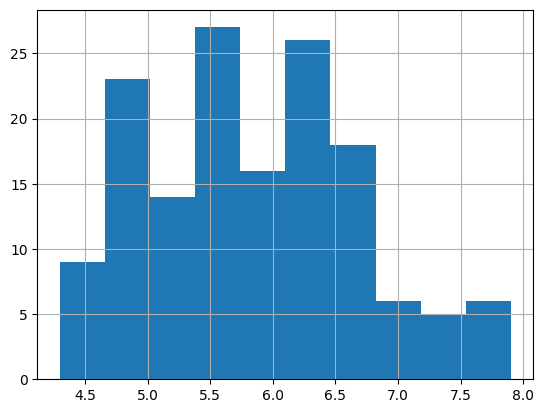

In [9]:
df['sepal length (cm)'].hist()  #count the sepal length

<Axes: >

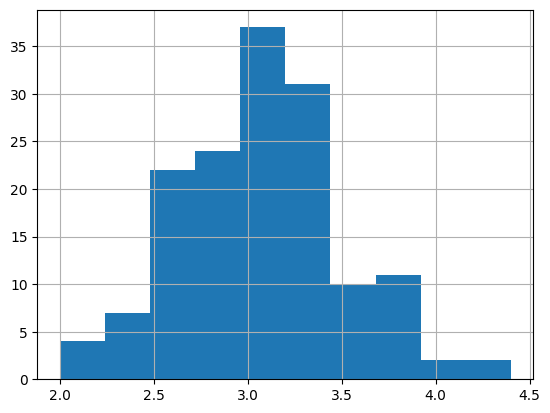

In [10]:
df['sepal width (cm)'].hist()

<Axes: >

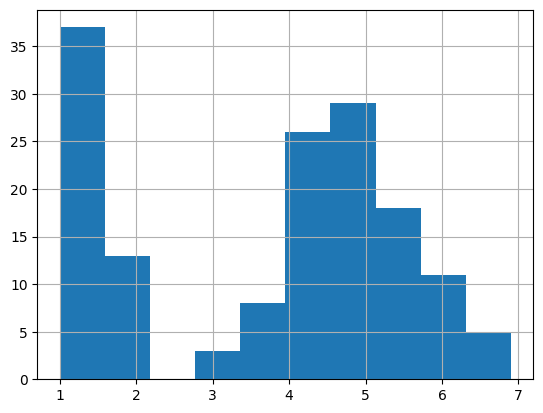

In [11]:
df['petal length (cm)'].hist()

<Axes: >

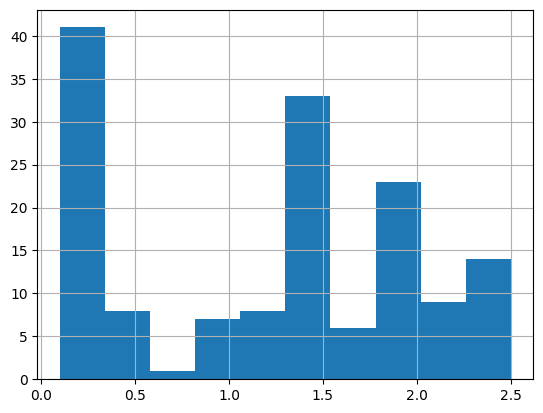

In [12]:
df['petal width (cm)'].hist()

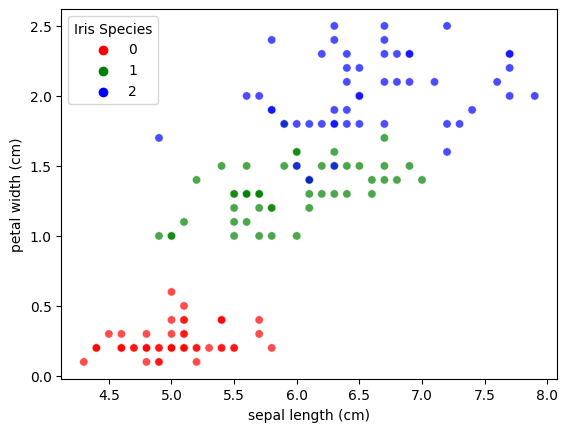

In [13]:
custom_palette = ["red", "green", "blue"]

# Create a scatter plot with custom colors for each Iris species
sns.scatterplot(data=iris_df, x="sepal length (cm)", y="petal width (cm)", hue="target", palette=custom_palette, alpha=0.7)

# Add a legend
plt.legend(title="Iris Species")

                  CORRELATION MATRIX

In [14]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


<Axes: >

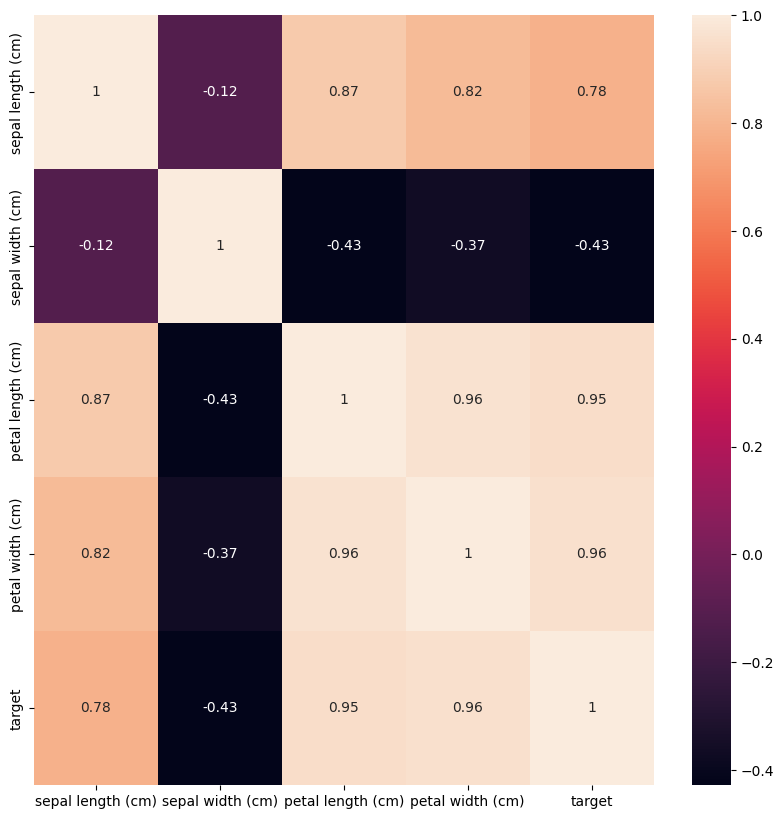

In [15]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True,ax=ax)

In [16]:
X = iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].values  # Features (sepal length, sepal width, petal length, petal width)
y = iris_df['target'].values

In [17]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [18]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

                    GRID SEARCH CV

In [21]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [22]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}

In [23]:
from sklearn.model_selection import GridSearchCV
scores = []
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(iris_df, iris_df['target'])
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
iris_df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
iris_df


,model,best_score,best_params
0,svm,1.0,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,1.0,{'n_estimators': 10}
2,logistic_regression,1.0,{'C': 1}
3,naive_bayes_gaussian,1.0,{}
4,naive_bayes_multinomial,1.0,{}
5,decision_tree,1.0,{'criterion': 'gini'}


                    Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression  

model = LogisticRegression()  


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.55, random_state = 47)

In [26]:
model.fit(X_train, y_train)

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
#print metrics to get the performance
print("Accuracy:",model.score(X_test, y_test)*100)

Accuracy: 95.18072289156626


In [28]:
expected=y
predicted=model.predict(X)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [29]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [30]:
print(metrics,classification_report(expected,predicted))

<module 'sklearn.metrics' from 'C:\\Users\\Dell\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\sklearn\\metrics\\__init__.py'>               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.91      0.98      0.94        50
           2       0.98      0.90      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [31]:
from sklearn.metrics import confusion_matrix
print(metrics,confusion_matrix(expected,predicted))


<module 'sklearn.metrics' from 'C:\\Users\\Dell\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\sklearn\\metrics\\__init__.py'> [[50  0  0]
 [ 0 49  1]
 [ 0  5 45]]


Here the Logistic Regression Accuracy score is 95.18% this is maximum accuracy

 The predicted value is setosa 50,
                        versicolor 49,
                        virginica 45

                           DECISION TREE

In [32]:
from sklearn.tree import DecisionTreeClassifier


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.55, random_state = 42)

In [34]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [35]:
#print metrics to get the performance
print("Accuracy:",model.score(X_test, y_test)*100)

Accuracy: 90.36144578313254


In [36]:
expected=y
predicted=model.predict(X)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2])

In [37]:
print(metrics,classification_report(expected,predicted))

<module 'sklearn.metrics' from 'C:\\Users\\Dell\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\sklearn\\metrics\\__init__.py'>               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.90      0.94      0.92        50
           2       0.94      0.90      0.92        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



In [38]:
print(metrics,confusion_matrix(expected,predicted))

<module 'sklearn.metrics' from 'C:\\Users\\Dell\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\sklearn\\metrics\\__init__.py'> [[50  0  0]
 [ 0 47  3]
 [ 0  5 45]]


Here the Decision tree Accuracy score 90.36% Setosa-50,versicolor-47,virginica-45

                                    RANDOM FOREST

In [39]:
from sklearn.ensemble import RandomForestClassifier


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.55, random_state = 42)

In [41]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
#print metrics to get the performance
print("Accuracy:",model.score(X_test, y_test)*100)

Accuracy: 98.79518072289156


In [43]:
expected=y
predicted=model.predict(X)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [44]:
print(metrics,classification_report(expected,predicted))

<module 'sklearn.metrics' from 'C:\\Users\\Dell\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\sklearn\\metrics\\__init__.py'>               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      1.00      0.99        50
           2       1.00      0.98      0.99        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



In [45]:
print(metrics,confusion_matrix(expected,predicted))

<module 'sklearn.metrics' from 'C:\\Users\\Dell\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\sklearn\\metrics\\__init__.py'> [[50  0  0]
 [ 0 50  0]
 [ 0  1 49]]


 In Random Forest the Accuracy score is 98.79%. Setosa -50,Versicolor-50,virginica-49.It is the best model

                                           SVC

In [46]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.55, random_state = 47)


In [47]:
model = SVC(kernel='linear', C=0.2, random_state=47)
model.fit(X_train, y_train)

SVC(C=0.2, kernel='linear', random_state=47)

In [48]:
#print metrics to get the performance
print("Accuracy:",model.score(X_test, y_test)*100)

Accuracy: 95.18072289156626


In [49]:
expected=y
predicted=model.predict(X)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [50]:
print(metrics,classification_report(expected,predicted))

<module 'sklearn.metrics' from 'C:\\Users\\Dell\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\sklearn\\metrics\\__init__.py'>               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.91      0.98      0.94        50
           2       0.98      0.90      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [51]:
print(metrics,confusion_matrix(expected,predicted))

<module 'sklearn.metrics' from 'C:\\Users\\Dell\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\sklearn\\metrics\\__init__.py'> [[50  0  0]
 [ 0 49  1]
 [ 0  5 45]]


Here In SVC the Accuracy Score is 95.18% Setosa -50,Versicolor-49,Virginica-45

                               KNeighbors Classifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.55, random_state = 47)



In [53]:
 # Adjust the number of neighbors
model = KNeighborsClassifier(n_neighbors=3) 
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [54]:
#print metrics to get the performance
print("Accuracy:",model.score(X_test, y_test)*100)

Accuracy: 96.3855421686747


In [55]:
expected=y
predicted=model.predict(X)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [56]:
print(metrics,classification_report(expected,predicted))

<module 'sklearn.metrics' from 'C:\\Users\\Dell\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\sklearn\\metrics\\__init__.py'>               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.96      0.96        50
           2       0.96      0.96      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [57]:
print(metrics,confusion_matrix(expected,predicted))

<module 'sklearn.metrics' from 'C:\\Users\\Dell\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\sklearn\\metrics\\__init__.py'> [[50  0  0]
 [ 0 48  2]
 [ 0  2 48]]


Here the KN the Accuracy score is 96.38% setosa-50,Versicolor-48,Virginica-48

                                    NAIVE BAYES

In [58]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.55, random_state = 42)

In [59]:
model= GaussianNB()
model.fit(X_train, y_train)



GaussianNB()

In [60]:
#print metrics to get the performance
print("Accuracy:",model.score(X_test, y_test)*100)

Accuracy: 98.79518072289156


In [61]:
expected=y
predicted=model.predict(X)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [62]:
print(metrics,classification_report(expected,predicted))

<module 'sklearn.metrics' from 'C:\\Users\\Dell\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\sklearn\\metrics\\__init__.py'>               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.94      0.93        50
           2       0.94      0.92      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



In [63]:
print(metrics,confusion_matrix(expected,predicted))

<module 'sklearn.metrics' from 'C:\\Users\\Dell\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\sklearn\\metrics\\__init__.py'> [[50  0  0]
 [ 0 47  3]
 [ 0  4 46]]


Here the Naive Bayes Accuracy score is 98.79% Setosa-50,Versicolor-47,Vercina-46. It is the best model from the overall observation.